<a href="https://colab.research.google.com/github/div-yash/Final-Year-Project/blob/main/Disease_Prediction_and_Medicine_Recommendation_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/div-yash/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest.git

Cloning into 'Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 49 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 569.18 KiB | 3.04 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [2]:
#importing the dependencies:
import pandas as pd
import numpy as np

In [3]:
#load the datasets:
df=pd.read_csv("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/datasets/Training.csv")

In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
df.shape

(4920, 133)

In [6]:
# unique diseases : 41
len(df['prognosis'].unique())

41

In [7]:
# kind of diseases:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Now the data is already pre-processed.

Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
#input
x=df.drop('prognosis',axis=1) #axis 1 means drop column wise
#output
y=df['prognosis']

In [10]:
le=LabelEncoder()
le.fit(y)
Y=le.transform(y)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=20)

In [12]:
x_train.shape

(3444, 132)

In [13]:
x_test.shape

(1476, 132)

In [14]:
y_train.shape

(3444,)

In [15]:
y_test.shape

(1476,)

In [16]:
# Training Random Forest Model
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [17]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [18]:
# Evaluating Model :
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        49
          10       1.00      1.00      1.00        37
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        41
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00

In [19]:
#Using k-Fold Cross-Validation with Random Forest

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores=cross_val_score(model,x_train,y_train,cv=5)

print(scores)

print("Average cross-validation scores : ",np.mean(scores))

[1.         0.99854862 0.99854862 1.         1.        ]
Average cross-validation scores :  0.9994194484760524


The model performs very similarly on all subsets of your training data.

This high CV score + high test accuracy (1.0) strongly suggests:

The data is likely very well-structured and separable.

There’s little to no overfitting, as generalization is excellent across unseen data chunks.

In [ ]:
# check for overfitting
# Check accuracy on training and test set
from sklearn.metrics import accuracy_score

# Train the model
model.fit(x_train, y_train)

# Predict on training and test sets
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Accuracy scores
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 1.0
Test Accuracy: 1.0


No overfitting detected

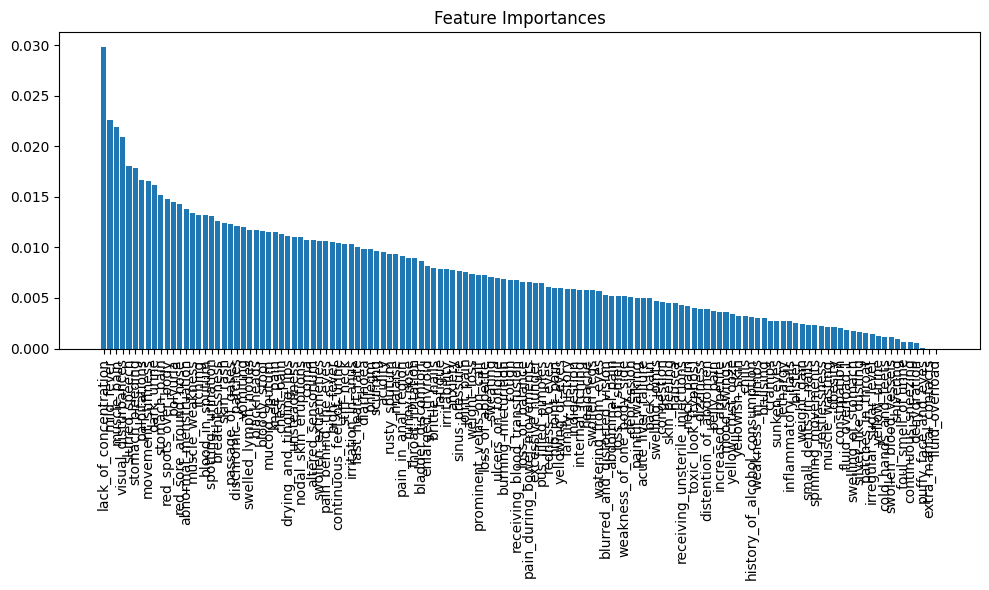

In [ ]:
# feature importance:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = x_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#saving model:
import pickle
pickle.dump(model,open("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/model/model.pkl",'wb'))

from google.colab import files

#Download the .pkl file
files.download('/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/model/model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#load the model:
model=pickle.load(open("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/model/model.pkl",'rb'))

In [ ]:
#test 1
print("Predicted label:", model.predict(x_test.iloc[0].values.reshape(1,-1)))
print("Actual label :",y_test[0])

Predicted label: [40]
Actual label : 40


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#test 2
print("Predicted label:", model.predict(x_test.iloc[10].values.reshape(1,-1)))
print("Actual label :",y_test[10])

Predicted label: [20]
Actual label : 20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Recommendation System and Prediction:

Loading other datasets: (pre-defined fully researched and structured dataset)

In [ ]:
#symptoms dataset
symptoms=pd.read_csv("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/datasets/symtoms_df.csv")
symptoms


,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN
...,...,...,...,...,...,...
4915,4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements
4916,4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring
4917,4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting


In [ ]:
#precautions dataset:
precautions=pd.read_csv("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/datasets/precautions_df.csv")
precautions

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [ ]:
#workout dataset:
workout=pd.read_csv("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/datasets/workout_df.csv")
workout=workout.drop('Unnamed: 0',axis=1)
workout=workout.drop('Unnamed: 0.1',axis=1)
workout

,disease,workout
0,Fungal infection,Avoid sugary foods
1,Fungal infection,Consume probiotics
2,Fungal infection,Increase intake of garlic
3,Fungal infection,Include yogurt in diet
4,Fungal infection,Limit processed foods
...,...,...
405,Impetigo,Consult a healthcare professional
406,Impetigo,Follow medical recommendations
407,Impetigo,Avoid scratching
408,Impetigo,Take prescribed antibiotics


In [ ]:

#descriptions dataset:
description=pd.read_csv("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/datasets/description.csv")
description

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...
5,Peptic ulcer disease,Peptic ulcer disease involves sores that devel...
6,AIDS,AIDS (Acquired Immunodeficiency Syndrome) is a...
7,Diabetes,Diabetes is a chronic condition that affects h...
8,Gastroenteritis,Gastroenteritis is an inflammation of the stom...
9,Bronchial Asthma,Bronchial Asthma is a respiratory condition ch...


In [ ]:
#medications dataset:
medication=pd.read_csv("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/datasets/medications.csv")
medication

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."
5,Peptic ulcer disease,"['Antibiotics', 'Proton Pump Inhibitors (PPIs)..."
6,AIDS,"['Antiretroviral drugs', 'Protease inhibitors'..."
7,Diabetes,"['Insulin', 'Metformin', 'Sulfonylureas', 'DPP..."
8,Gastroenteritis,"['Antibiotics', 'Antiemetic drugs', 'Antidiarr..."
9,Bronchial Asthma,"['Bronchodilators', 'Inhaled corticosteroids',..."


In [ ]:
#diets datasets:
diets=pd.read_csv("/content/Medicine-Recommendation-and-Disease-Prediction-using-Random-Forest/datasets/diets.csv")
diets

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."
5,Peptic ulcer disease,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
6,AIDS,"['Balanced Diet', 'Protein-rich foods', 'Fruit..."
7,Diabetes,"['Low-Glycemic Diet', 'Fiber-rich foods', 'Lea..."
8,Gastroenteritis,"['Bland Diet', 'Bananas', 'Rice', 'Applesauce'..."
9,Bronchial Asthma,"['Anti-Inflammatory Diet', 'Omega-3-rich foods..."


In [ ]:
#helper function:
def helper(dis):
  desc=description[description['Disease']==dis]['Description']
  desc=" ".join([w for w in desc])

  pre=precautions[precautions['Disease']==dis][['Precaution_1','Precaution_2','Precaution_3','Precaution_4']]
  pre=[col for col in pre.values]

  med=medication[medication['Disease']==dis][['Medication']]
  med=[med for med in med.values]

  diet=diets[diets['Disease']==dis][['Diet']]
  diet=[diet for diet in diet.values]

  work=workout[workout['disease']==dis][['workout']]
  work=[work for work in work.values]
  return desc,pre,med,diet,work


symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}


In [ ]:
#model prediction function
def get_predicted_value(patient_symptoms):
  input_vector=np.zeros(len(symptoms_dict)) #creating empty array with zeros and length of array will be 132(length of symptoms_dict).

  for item in patient_symptoms:
    input_vector[symptoms_dict[item]]=1
  return diseases_list[model.predict([input_vector])[0]]


In [ ]:
pip install colorama tabulate


In [ ]:
#test1:
symptoms=input("Enter your symptoms (comma-seperated): ")
user_symptoms=[s.strip() for s in symptoms.split(',')]
user_symptoms=[sym.strip("[]'") for sym in user_symptoms]
predicted_disease=get_predicted_value(user_symptoms)
desc,pre,med,diet,work=helper(predicted_disease)
print("___________________________________________________________________________")
#results printing :
print("__________Predicted Disease____________")
print(predicted_disease)
print("___________________________________________________________________________")

print("__________Description____________")
print(desc)
print("___________________________________________________________________________")

print("__________Precautions____________")
count =1
for p_i in pre[0]:
  print(count,": ",p_i)
  count+=1
print("___________________________________________________________________________")


print("__________Medications____________")
count = 1
for m_i in med:
  # Convert the list of strings to a single string
  medications_str = ', '.join(m_i[0].strip("[]'").split("', '"))
  print(count, ": ", medications_str)
  count += 1
print("___________________________________________________________________________")

print("__________Workout_____________")
count =1
for w_i in work:
  workout_str=', '.join(w_i[0].strip("[]'").split("', '"))
  print(count," : ",workout_str)
  count+=1
print("___________________________________________________________________________")


print("___________Diet_________")
count =1
for d in diet:
  diet_str=', '.join(d[0].strip("[]'").split("', '"))
  print(count," : ",diet_str)
  count+=1
print("___________________________________________________________________________")


Enter your symptoms : burning_micturition,	bladder_discomfort	,foul_smell_of urine,continuous_feel_of_urine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


___________________________________________________________________________
__________Predicted Disease____________
Urinary tract infection
___________________________________________________________________________
__________Description____________
Urinary tract infection is an infection in any part of the urinary system.
___________________________________________________________________________
__________Precautions____________
1 :  drink plenty of water
2 :  increase vitamin c intake
3 :  drink cranberry juice
4 :  take probiotics
___________________________________________________________________________
__________Medications____________
1 :  Antibiotics, Urinary analgesics, Phenazopyridine, Antispasmodics, Probiotics
___________________________________________________________________________
__________Workout_____________
1  :  Stay hydrated
2  :  Consume cranberry products
3  :  Include vitamin C-rich foods
4  :  Limit caffeine and alcohol
5  :  Consume probiotics
6  :  Avoid sp